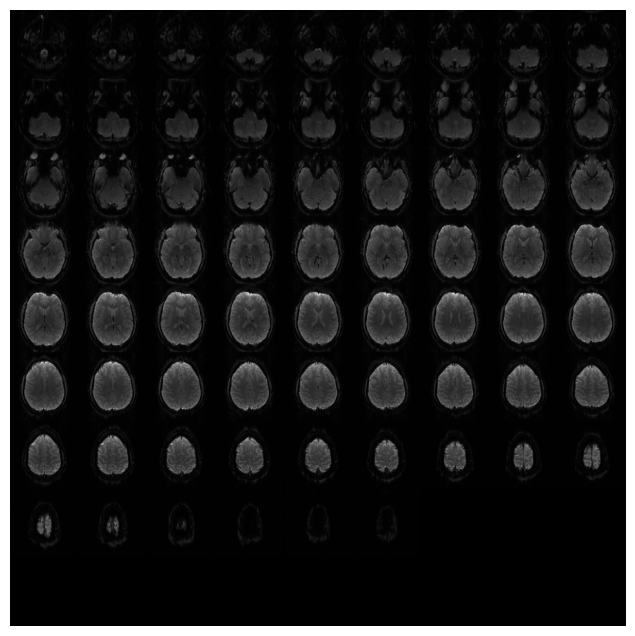

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pydicom

plt.rcParams['figure.figsize'] = [16, 8]

# Read the DICOM file
dicom_file = pydicom.dcmread('sample_fmri_image.dcm')
A = dicom_file.pixel_array

# Convert to grayscale if necessary
if len(A.shape) == 3:
	X = np.mean(A, -1)
else:
	X = A

img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')         
plt.show()

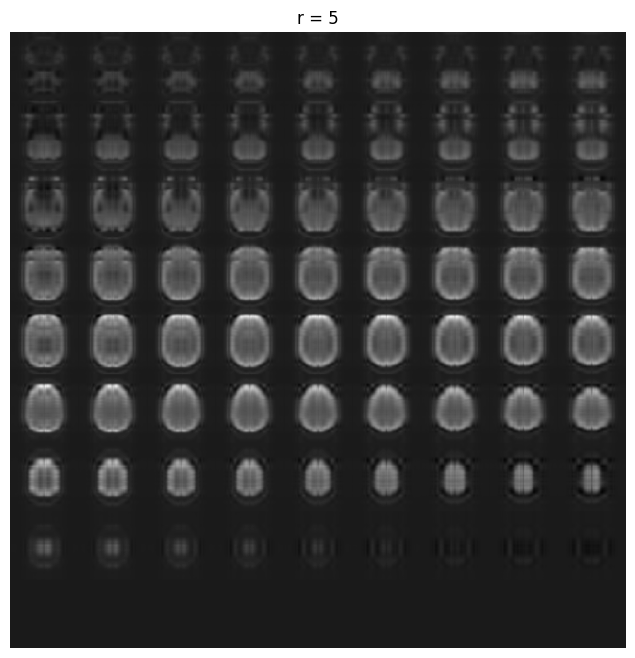

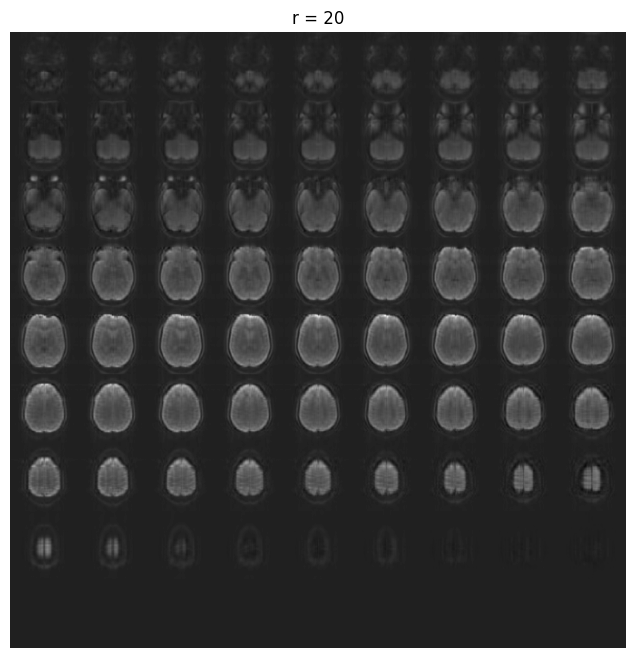

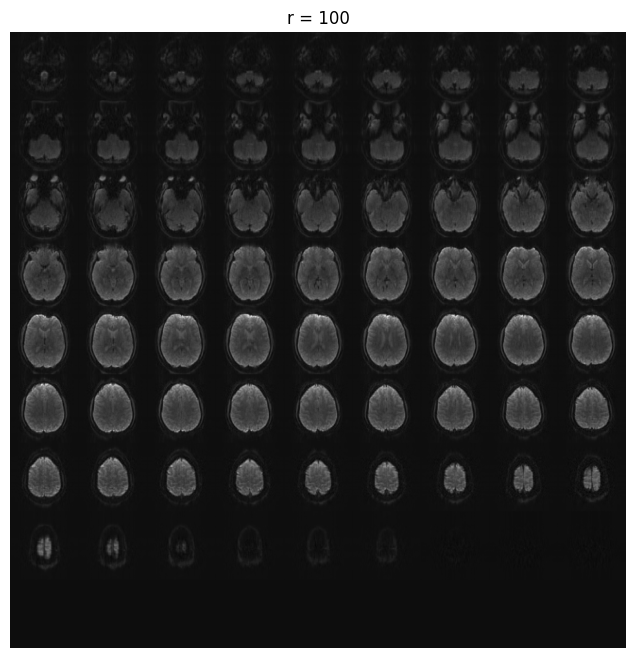

In [3]:
U, S, VT = np.linalg.svd(X,full_matrices=False)
S = np.diag(S)

j = 0
for r in (5, 20, 100):
    # Construct approximate image
    Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    plt.figure(j+1)
    j += 1
    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('r = ' + str(r))
    plt.show()

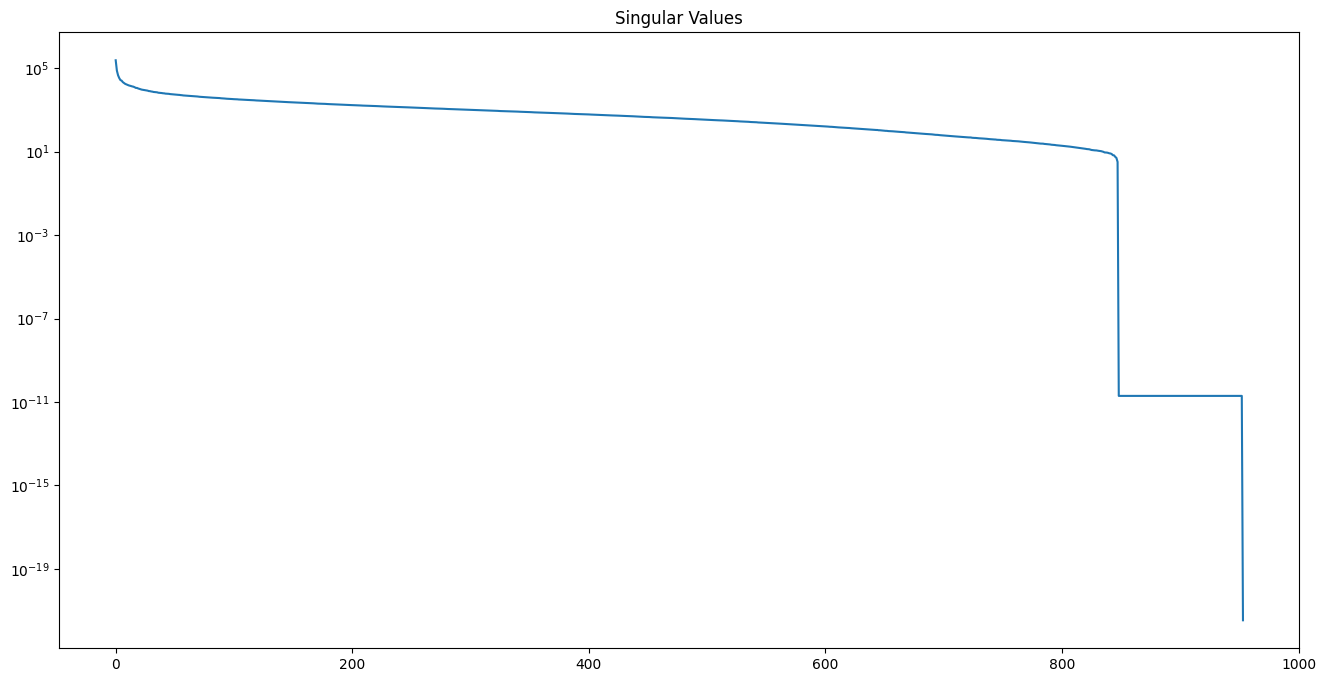

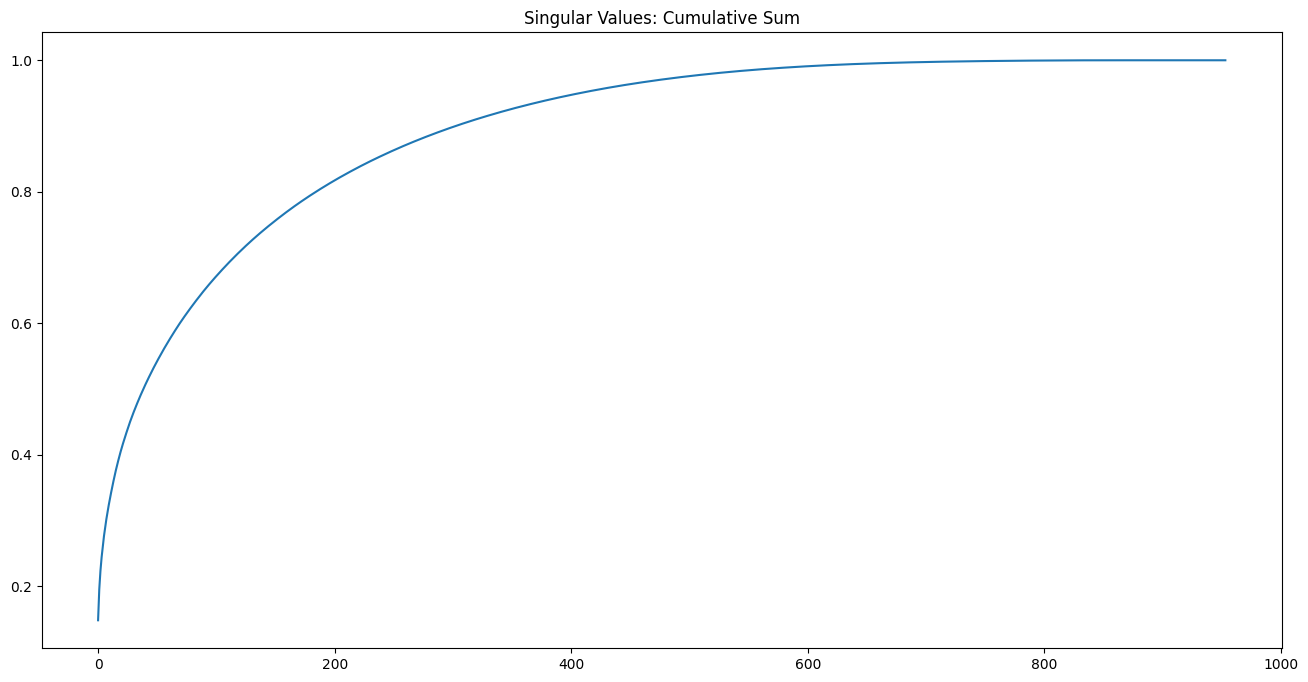

In [4]:
## f_ch01_ex02_2

plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')
plt.show()

In [7]:
import os

# Save the images with different r values
for r in (5, 20, 100):
    Xapprox = U[:, :r] @ S[0:r, :r] @ VT[:r, :]
    plt.figure()
    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('r = ' + str(r))
    filename = f'approx_image_r_{r}.png'
    plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.close()
    print(f'Size of {filename}: {os.path.getsize(filename)} bytes')

Size of approx_image_r_5.png: 166957 bytes
Size of approx_image_r_20.png: 186320 bytes
Size of approx_image_r_100.png: 234826 bytes


In [6]:
import sys

for r in (5, 20, 100):
    Xapprox = U[:, :r] @ S[0:r, :r] @ VT[:r, :]
    print(f'Space memory for r = {r}: {sys.getsizeof(Xapprox)} bytes')

Space memory for r = 5: 7281056 bytes
Space memory for r = 20: 7281056 bytes
Space memory for r = 100: 7281056 bytes
